In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')
#pd.reset_option('display.max_columns')

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV, RFE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesRegressor, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Data ensembling

In [3]:
descriptor_df = pd.read_excel('dummy.xlsx', None)
all_ligand_descriptors = []
for key in descriptor_df.keys():
    all_ligand_descriptors.append(descriptor_df[key])
descriptors_concatenated = pd.concat(all_ligand_descriptors,axis=0,ignore_index=True)

In [4]:
dummy_df = descriptors_concatenated
dummy_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
dummy_df.head()

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,39_SD-027,16.401355,12.830851,0,0,27.538947,2.351515,4.658626,27.538947,1.311378,...,9.782844,72.950827,281.116427,7.808790,1085,28,108,124,5.916667,4.638889
1,24_SD-012,23.120752,17.496509,0,0,36.792136,2.500037,4.883480,36.792136,1.268694,...,10.341904,79.079406,418.142324,8.198869,2404,45,158,185,9.562500,6.097222
2,102_wo17590_77,20.413286,16.725919,0,0,34.468616,2.492661,4.888530,34.468616,1.325716,...,10.230955,80.593694,352.164774,7.655756,1672,41,140,168,7.500000,5.805556
3,1_BMS986165_PKD_TYK2_prw_nowater_nimbus01,25.569882,20.595148,0,2,41.680715,2.508615,4.935337,41.680715,1.302522,...,10.515777,88.755240,437.192386,7.948952,2867,53,178,216,9.944444,6.888889
4,60_wo14660_81,21.489002,17.014394,0,0,35.859929,2.400952,4.801904,35.859929,1.280712,...,10.136621,63.084823,378.144038,8.220523,2107,43,142,164,9.500000,6.277778


#### Non-applying descriptors search

Search for those descriptors that could not be computed by _Modrded_ and discard them.

In [6]:
non_applying_descriptors = []
for i in range(1,1827):
    if (str(dummy_df.dtypes[i]) != 'float64') and (str(dummy_df.dtypes[i]) != 'int64') and (str(dummy_df.dtypes[i]) != 'bool'):
        non_applying_descriptors.append(dummy_df.columns[i])
        

In [7]:
for descriptor in non_applying_descriptors:
    dummy_df.drop(columns=[descriptor], inplace=True)

In [8]:
dummy_df.head()

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,39_SD-027,16.401355,12.830851,0,0,27.538947,2.351515,4.658626,27.538947,1.311378,...,9.782844,72.950827,281.116427,7.808790,1085,28,108,124,5.916667,4.638889
1,24_SD-012,23.120752,17.496509,0,0,36.792136,2.500037,4.883480,36.792136,1.268694,...,10.341904,79.079406,418.142324,8.198869,2404,45,158,185,9.562500,6.097222
2,102_wo17590_77,20.413286,16.725919,0,0,34.468616,2.492661,4.888530,34.468616,1.325716,...,10.230955,80.593694,352.164774,7.655756,1672,41,140,168,7.500000,5.805556
3,1_BMS986165_PKD_TYK2_prw_nowater_nimbus01,25.569882,20.595148,0,2,41.680715,2.508615,4.935337,41.680715,1.302522,...,10.515777,88.755240,437.192386,7.948952,2867,53,178,216,9.944444,6.888889
4,60_wo14660_81,21.489002,17.014394,0,0,35.859929,2.400952,4.801904,35.859929,1.280712,...,10.136621,63.084823,378.144038,8.220523,2107,43,142,164,9.500000,6.277778


#### _BMS_ and _wo_ ligands dropping

We decided to discard this two groups of ligads as they come from two alternative sources. 
We keep on working with _SD_ and _LAS_.

In [9]:
for index, row in dummy_df.iterrows():
    if 'BMS' in row['Ligand']:
        dummy_df.drop(index, inplace=True)

for index, row in dummy_df.iterrows():
    if 'wo' in row['Ligand']:
        dummy_df.drop(index, inplace=True)
        
for index, row in dummy_df.iterrows():
    if '30_' in row['Ligand']:
        dummy_df.drop(index, inplace=True)

In [10]:
dummy_df.reset_index(drop=True, inplace=True)
dummy_df['Ligand']

0        39_SD-027
1        24_SD-012
2        29_SD-017
3        33_SD-021
4        17_SD-002
5        36_SD-024
6        18_SD-003
7        25_SD-013
8        23_SD-011
9     12_LAS203756
10       34_SD-022
11       28_SD-016
12       26_SD-014
13       37_SD-025
14    13_LAS203888
15       21_SD-009
16       19_SD-006
17       22_SD-010
18       35_SD-023
19       38_SD-026
20       32_SD-020
21    15_LAS203932
22       31_SD-019
23    16_LAS203965
24    14_LAS203900
25       27_SD-015
26       20_SD-008
Name: Ligand, dtype: object

In [11]:
dummy_df.sort_values(by=['Ligand'], inplace=True)
dummy_df.reset_index(drop=True, inplace=True)
dummy_df.head()

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12_LAS203756,24.793826,18.444754,0,0,41.003700,2.499482,4.946810,41.003700,1.322700,...,10.454812,81.186093,423.150681,8.463014,2776,52,170,204,8.472222,6.694444
1,13_LAS203888,17.953468,15.053156,0,0,28.680180,2.481106,4.871045,28.680180,1.246964,...,10.089178,71.498752,310.154209,7.564737,1182,36,122,144,8.250000,5.027778
2,14_LAS203900,24.017769,17.838004,0,1,39.902350,2.489954,4.913111,39.902350,1.330078,...,10.391116,79.976698,406.160518,8.123210,2558,49,164,196,7.611111,6.500000
3,15_LAS203932,23.529442,19.100026,0,0,38.633155,2.438811,4.855461,38.633155,1.287772,...,10.333222,85.157707,408.165837,8.163317,2496,47,160,190,9.722222,6.583333
4,16_LAS203965,21.896449,17.252001,0,0,36.699679,2.550926,4.945786,36.699679,1.310703,...,10.312712,79.570682,379.175673,7.738279,2170,45,150,180,8.611111,6.250000


#### pIC50 values loading

In [12]:
pic50_raw = pd.read_excel('/home/alexis/Desktop/PeleAI_data/y_data.xlsx')

In [13]:
pic50_raw['Ligand']

0     12_LAS203756
1     13_LAS203888
2     14_LAS203900
3     15_LAS203932
4     16_LAS203965
5        17_SD-002
6        18_SD-003
7        19_SD-006
8        20_SD-008
9        21_SD-009
10       22_SD-010
11       23_SD-011
12       24_SD-012
13       25_SD-013
14       26_SD-014
15       27_SD-015
16       28_SD-016
17       29_SD-017
18       31_SD-019
19       32_SD-020
20       33_SD-021
21       34_SD-022
22       35_SD-023
23       36_SD-024
24       37_SD-025
25       38_SD-026
26       39_SD-027
Name: Ligand, dtype: object

### Descriptor curation

#### Correlation matrix and high correlated descriptors dropping

Computing of the correlation matrix, plotted below, of the ~1500 descriptors computed. Those descriptors that show a correlation coefficient above 0.8 will be discarded.

In [14]:
correlated_features = set()
correlation_matrix = dummy_df.drop('Ligand', axis=1).corr()

In [15]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'MATS7pe', 'AATS4Z', 'Xch-3d', 'Mor01p', 'AATSC7v', 'GATS6Z', 'AATSC8dv', 'SpDiam_D', 'AATS8se', 'LogEE_Dzi', 'ATSC5are', 'nBondsT', 'IC0', 'AATSC7p', 'AATSC5s', 'AATSC0c', 'AATS5dv', 'GATS7are', 'ETA_beta', 'AATS7Z', 'Xc-3dv', 'BIC0', 'Xc-5dv', 'GATS3p', 'SsssN', 'Xp-4d', 'BCUTpe-1l', 'AETA_eta_FL', 'SpAD_Dzp', 'MWC07', 'AATSC5v', 'GATS4dv', 'AATSC7m', 'AATS1are', 'MATS2m', 'AATS5v', 'AATSC0m', 'SpAD_Dzv', 'SpMax_Dzi', 'MID_C', 'AATSC2se', 'AATSC8v', 'VE3_Dzi', 'n4Ring', 'AATS1p', 'AATSC0are', 'AATSC7s', 'AATS2d', 'SlogP_VSA1', 'MATS4m', 'TpiPC10', 'SRW07', 'VR1_Dzse', 'SRW08', 'MATS7s', 'GGI6', 'AATSC1m', 'ETA_epsilon_3', 'ATS5are', 'NaaO', 'TMWC10', 'Mse', 'n6aRing', 'SRW05', 'AATSC3Z', 'ATSC0s', 'ATSC6are', 'SlogP_VSA11', 'AATSC2s', 'AATSC3s', 'GGI2', 'VR3_Dzp', 'Xp-7dv', 'MID_h', 'SRW09', 'Kier1', 'MATS7v', 'GATS5pe', 'MATS6Z', 'nAromBond', 'AATSC4pe', 'AATSC0pe', 'AATSC8m', 'AATS6dv', 'GATS2v', 'GATS3pe', 'VE3_D', 'AATSC7dv', 'piPC3', 'SpAD_Dt', 'AATS4m', 'SpAD_Dzpe', 'FPSA4', '

In [16]:
print("Correlated descriptors computed: {}".format(len(correlated_features)))
print("Number of descriptors before discard: {}".format(len(dummy_df.columns)))
dummy_df = dummy_df.drop(correlated_features, axis=1)
print("Number of descriptors after discard: {}".format(len(dummy_df.columns)))

Correlated descriptors computed: 1102
Number of descriptors before discard: 1503
Number of descriptors after discard: 401


#### Correlation matrix

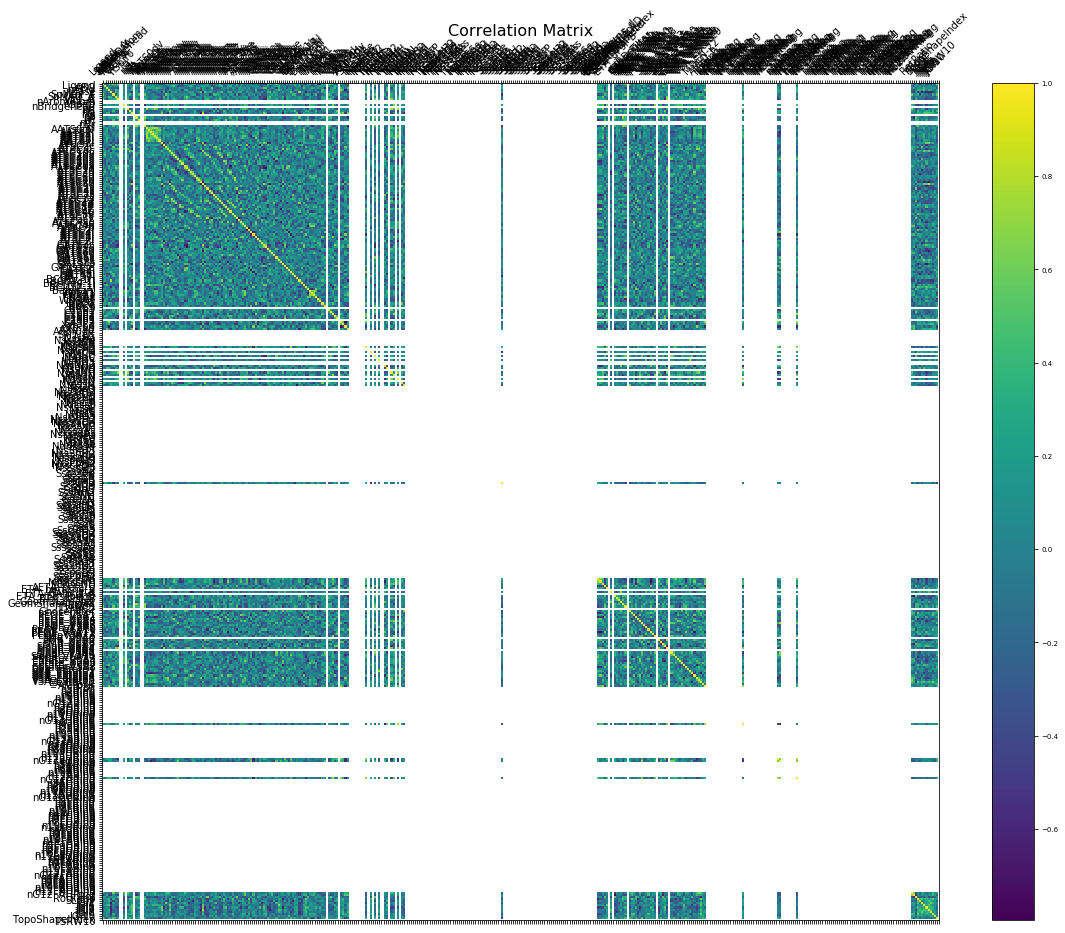

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dummy_df.corr(), fignum=f.number)
plt.xticks(range(dummy_df.shape[1]), dummy_df.columns, fontsize=10, rotation=45)
plt.yticks(range(dummy_df.shape[1]), dummy_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix', fontsize=16);

### Data splitting

In [18]:
dummy_df = dummy_df.merge(pic50_raw, how='left')

In [19]:
dummy_df.head()

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,TSRW10,IC50
0,12_LAS203756,24.793826,0,0,2.499482,1.322700,4.440538,597.574331,18,0,...,0.026757,0.028958,0.017766,0.015289,0.008381,0.006972,0.006926,0.875,81.186093,-4.824
1,13_LAS203888,17.953468,0,0,2.481106,1.246964,3.925606,230.400001,15,0,...,0.040794,0.033704,0.018925,0.013818,0.014253,0.012246,0.004115,1.000,71.498752,-10.292
2,14_LAS203900,24.017769,0,1,2.489954,1.330078,4.496545,499.352788,21,0,...,0.028804,0.016311,0.018386,0.012110,0.005810,0.006563,0.004835,0.875,79.976698,-7.284
3,15_LAS203932,23.529442,0,0,2.438811,1.287772,4.888546,227.217438,17,0,...,0.034610,0.025721,0.017908,0.013517,0.010860,0.008173,0.008159,1.000,85.157707,-11.456
4,16_LAS203965,21.896449,0,0,2.550926,1.310703,4.089075,1640.002566,18,0,...,0.040631,0.025306,0.017225,0.012408,0.009386,0.009661,0.006200,0.875,79.570682,-7.259


In [189]:
train, test = train_test_split(dummy_df, test_size=0.24)

In [190]:
test

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,TSRW10,IC50
9,21_SD-009,21.408122,0,0,2.415928,1.272444,4.819938,183.316566,12,0,...,0.035038,0.028826,0.017143,0.015625,0.010097,0.009063,0.008072,1.000000,81.665307,-9.268
14,26_SD-014,25.012606,0,0,2.442549,1.278882,4.985878,258.000375,11,0,...,0.031133,0.029494,0.016569,0.014376,0.009877,0.009427,0.008426,0.857143,87.477037,-7.066
0,12_LAS203756,24.793826,0,0,2.499482,1.322700,4.440538,597.574331,18,0,...,0.026757,0.028958,0.017766,0.015289,0.008381,0.006972,0.006926,0.875000,81.186093,-4.824
11,23_SD-011,21.679272,0,0,2.366948,1.253763,4.624579,283.956052,17,0,...,0.021742,0.029689,0.016776,0.014010,0.008412,0.009403,0.008081,0.888889,76.413702,-7.854
25,38_SD-026,20.579394,0,2,2.567485,1.276277,4.206620,241.043676,10,0,...,0.048462,0.034330,0.019147,0.014064,0.011379,0.011941,0.010209,1.000000,77.712224,-5.174
10,22_SD-010,24.288920,0,1,2.367520,1.301283,4.747259,419.620993,17,0,...,0.023889,0.025965,0.015395,0.010213,0.007749,0.007639,0.006485,0.900000,80.035639,-8.721
4,16_LAS203965,21.896449,0,0,2.550926,1.310703,4.089075,1640.002566,18,0,...,0.040631,0.025306,0.017225,0.012408,0.009386,0.009661,0.006200,0.875000,79.570682,-7.259


In [191]:
train

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,TSRW10,IC50
26,39_SD-027,16.401355,0,0,2.351515,1.311378,3.989248,179.986399,12,0,...,0.040362,0.023865,0.009515,0.014640,0.009574,0.007217,0.007414,0.857143,72.950827,-4.824
5,17_SD-002,20.810405,0,0,2.411799,1.257524,4.763671,169.907127,12,0,...,0.032724,0.030293,0.017606,0.016470,0.009910,0.009087,0.008048,1.000000,80.526405,-8.337
12,24_SD-012,23.120752,0,0,2.500037,1.268694,4.211544,399.710054,15,0,...,0.043320,0.020339,0.021463,0.016440,0.015736,0.007567,0.008254,0.875000,79.079406,-5.796
15,27_SD-015,27.512863,0,0,2.492887,1.336666,4.823638,530.661007,21,0,...,0.034931,0.021442,0.017890,0.010635,0.008011,0.007116,0.005979,1.000000,85.660541,-6.509
6,18_SD-003,20.632065,0,0,2.403846,1.291365,4.680105,186.452688,12,0,...,0.033764,0.028882,0.016961,0.013696,0.009962,0.008996,0.007448,1.000000,80.381982,-9.284
1,13_LAS203888,17.953468,0,0,2.481106,1.246964,3.925606,230.400001,15,0,...,0.040794,0.033704,0.018925,0.013818,0.014253,0.012246,0.004115,1.000000,71.498752,-10.292
23,36_SD-024,17.236029,0,3,2.465598,1.236262,4.134028,180.284855,5,0,...,0.032796,0.031099,0.023850,0.017306,0.014143,0.010605,0.007522,1.000000,70.296651,-5.509
18,31_SD-019,23.128092,0,0,2.485026,1.265543,4.589305,245.959491,12,0,...,0.036926,0.024543,0.020116,0.014527,0.015052,0.009667,0.009047,1.000000,84.463671,-7.886
17,29_SD-017,21.644929,0,0,2.485455,1.268549,4.499820,213.294583,12,0,...,0.031415,0.028882,0.019152,0.017424,0.010971,0.011817,0.007332,0.833333,82.151483,-7.886
2,14_LAS203900,24.017769,0,1,2.489954,1.330078,4.496545,499.352788,21,0,...,0.028804,0.016311,0.018386,0.012110,0.005810,0.006563,0.004835,0.875000,79.976698,-7.284


In [192]:
ic50_train = train['IC50']
ic50_test = test['IC50']

In [193]:
ic50_train

26    -4.824
5     -8.337
12    -5.796
15    -6.509
6     -9.284
1    -10.292
23    -5.509
18    -7.886
17    -7.886
2     -7.284
13    -6.456
22    -6.886
7     -8.194
16    -5.312
8     -9.420
3    -11.456
20    -6.469
19    -5.699
21    -6.658
24    -6.854
Name: IC50, dtype: float64

In [194]:
ic50_test

9    -9.268
14   -7.066
0    -4.824
11   -7.854
25   -5.174
10   -8.721
4    -7.259
Name: IC50, dtype: float64

In [195]:
train.drop(['Ligand','IC50'], axis=1, inplace=True)
test.drop(['Ligand','IC50'], axis=1, inplace=True)

In [196]:
train.head()

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI2,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,TSRW10
26,16.401355,0,0,2.351515,1.311378,3.989248,179.986399,12,0,0,...,0.065476,0.040362,0.023865,0.009515,0.014640,0.009574,0.007217,0.007414,0.857143,72.950827
5,20.810405,0,0,2.411799,1.257524,4.763671,169.907127,12,0,0,...,0.089181,0.032724,0.030293,0.017606,0.016470,0.009910,0.009087,0.008048,1.000000,80.526405
12,23.120752,0,0,2.500037,1.268694,4.211544,399.710054,15,0,0,...,0.066194,0.043320,0.020339,0.021463,0.016440,0.015736,0.007567,0.008254,0.875000,79.079406
15,27.512863,0,0,2.492887,1.336666,4.823638,530.661007,21,0,0,...,0.072727,0.034931,0.021442,0.017890,0.010635,0.008011,0.007116,0.005979,1.000000,85.660541
6,20.632065,0,0,2.403846,1.291365,4.680105,186.452688,12,0,0,...,0.085586,0.033764,0.028882,0.016961,0.013696,0.009962,0.008996,0.007448,1.000000,80.381982


In [197]:
test.head()

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI2,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,TSRW10
9,21.408122,0,0,2.415928,1.272444,4.819938,183.316566,12,0,0,...,0.086895,0.035038,0.028826,0.017143,0.015625,0.010097,0.009063,0.008072,1.000000,81.665307
14,25.012606,0,0,2.442549,1.278882,4.985878,258.000375,11,0,0,...,0.086288,0.031133,0.029494,0.016569,0.014376,0.009877,0.009427,0.008426,0.857143,87.477037
0,24.793826,0,0,2.499482,1.322700,4.440538,597.574331,18,0,0,...,0.071111,0.026757,0.028958,0.017766,0.015289,0.008381,0.006972,0.006926,0.875000,81.186093
11,21.679272,0,0,2.366948,1.253763,4.624579,283.956052,17,0,0,...,0.059621,0.021742,0.029689,0.016776,0.014010,0.008412,0.009403,0.008081,0.888889,76.413702
25,20.579394,0,2,2.567485,1.276277,4.206620,241.043676,10,0,0,...,0.103175,0.048462,0.034330,0.019147,0.014064,0.011379,0.011941,0.010209,1.000000,77.712224


#### Replace Na values

Also to replace with mean or median

In [198]:
train.fillna(value=0.0, inplace=True)
test.fillna(value=0.0, inplace=True)

#### Transform pIC50 values

In [199]:
ic50_train_enc = [1 if ic50 > -7 else 0 for ic50 in ic50_train.values]
ic50_test_enc = [1 if ic50 > -7 else 0 for ic50 in ic50_test.values]

In [202]:
train.to_csv("train.csv")
ic50_train.to_csv("ic50_train.csv")
df_ic50_train_enc = pd.DataFrame(ic50_train_enc)
df_ic50_train_enc.to_csv("ic50_train_enc.csv")
test.to_csv("test.csv")
ic50_test.to_csv("ic50_test.csv")
df_ic50_test_enc = pd.DataFrame(ic50_test_enc)
df_ic50_test_enc.to_csv("ic50_test_enc.csv")

### Recursive feature elimination (RFE)

#### By Support Vector Classifier (SVC)

- Error report:

        * n_splits=2 cannot be greater than the number of members in each class.
        * The classifier does not expose "coef_" or "feature_importances_" attributes
        
Dependence on train/test split

In [170]:
svc = LinearSVC()
rfe = RFE(svc)
rfe.fit(train, ic50_train_enc)
print('Optimal number of features: {}'.format(rfe.n_features_))

Optimal number of features: 200


In [171]:
print(np.where(rfe.support_ == False)[0])

train.drop(train.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)
test.drop(test.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)

[ 15  18  19 107 113 118 119 120 121 122 123 124 125 127 129 131 133 134
 137 140 142 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 234 235 236 242 244 265 271 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 325 326 327 328 329 330 331 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 348 349 351 353 356 357 358 359 360 361 362
 363 364 365 367 368 369 370 372 373 374 376 377 378 379 380 381 382 383
 385 386]


#### By Ensemble, Random Forest (RF) and Extremely Randomized Trees (Extra Trees Classifier)

##### Ensemble

In [36]:
stump = DecisionTreeClassifier(max_depth=1)
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [37]:
stump.fit(train, np.ravel(ic50_train_enc))
ensemble.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [38]:
y_pred_stump = stump.predict(test)
y_pred_ensemble = ensemble.predict(test)

In [39]:
stump_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_ensemble)

In [40]:
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the ensemble is {ensemble_accuracy*100:.1f} %")

The accuracy of the stump is 57.1 %
The accuracy of the ensemble is 57.1 %


##### Random Forest

In [41]:
tree = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")

random_forest = BaggingClassifier(base_estimator = tree, n_estimators = 1000,bootstrap = True)

In [42]:
tree.fit(train, np.ravel(ic50_train_enc))
random_forest.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
     

In [43]:
y_pred_tree = tree.predict(test)
y_pred_random_forest = random_forest.predict(test)

In [44]:
tree_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_tree)
random_forest_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_random_forest)

In [45]:
print(f"The accuracy of the tree is {tree_accuracy*100:.1f} %")
print(f"The accuracy of the Random Forest is {random_forest_accuracy*100:.1f} %")

The accuracy of the tree is 85.7 %
The accuracy of the Random Forest is 57.1 %


##### Extra Trees Classifier

In [46]:
rm_tree = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

extra_trees = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [47]:
rm_tree.fit(train, np.ravel(ic50_train_enc))
extra_trees.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [48]:
y_pred_rm_tree = rm_tree.predict(test)
y_pred_extra_trees = extra_trees.predict(test)

In [49]:
rm_tree_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_rm_tree)
extra_trees_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_extra_trees)

In [50]:
print(f"The accuracy of the tree is {rm_tree_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {extra_trees_accuracy*100:.1f} %")

The accuracy of the tree is 14.3 %
The accuracy of the Extra Trees is 57.1 %


##### Proceeding to RFE-CV with Random Forest Classifier

After several runs ...

In [ ]:
rfc = RandomForestClassifier(random_state=101)

In [ ]:
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(2), scoring='accuracy')

In [ ]:
rfecv.fit(train, ic50_train_enc)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

###### Dropping least important descriptors

In [ ]:
print(np.where(rfecv.support_ == False)[0])

train.drop(train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
test.drop(test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

##### Descriptors' relevance

In [ ]:
dset = pd.DataFrame()
dset['attr'] = train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()



In [ ]:
dset.head()

### Support Vector Machine (SVM) 

#### Grid search cross-validation and SVM classificator

In [172]:
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svc = SVC()
clf = GridSearchCV(svc, param_grid = parameters)

In [173]:
clf.fit(train, ic50_train_enc)

/home/alexis/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]),
                         'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1]),
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [174]:
ypred = clf.predict(test)

In [175]:
metrics.accuracy_score(ic50_test_enc, ypred)

0.42857142857142855

#### Grid search cross-validation and SVM regressor

In [176]:
from sklearn.svm import SVR
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svr = SVR()
clf = GridSearchCV(svr, param_grid = parameters)

In [177]:
clf.fit(train, ic50_train)

/home/alexis/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]),
                         'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1]),
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [178]:
ypred=clf.predict(test)

In [179]:
metrics.r2_score(ic50_test, ypred)

-0.014373780231112576

### Neural networks

#### Scaling

In [180]:
scaler = StandardScaler()

scaler.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [181]:
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)

#### Multi-Layer Perceptor Classifier (MLPC)

In [182]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [183]:
mlp.fit(train_sc,ic50_train_enc)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [184]:
predictions = mlp.predict(test_sc)

In [185]:
print(confusion_matrix(ic50_test_enc,predictions))
print(classification_report(ic50_test_enc,predictions))

[[4 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



### Gradient Boosting Classifier

#### Scaling

In [186]:
scaler = MinMaxScaler()

train_mmsc = scaler.fit_transform(train)
test_mmsc = scaler.fit_transform(test)

#### Learning rates

A learning rate that maximizes accuracy in both training and test sets.

In [187]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_mmsc, ic50_train_enc)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_mmsc, ic50_train_enc)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(test_mmsc, ic50_test_enc)))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (test): 0.857

Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (test): 0.857

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (test): 0.714

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (test): 0.714

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (test): 0.714

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (test): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (test): 0.571



In [188]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train_mmsc, ic50_train_enc)
predictions = gb_clf2.predict(test_mmsc)

print("Confusion Matrix:")
print(confusion_matrix(ic50_test_enc, predictions))

print("Classification Report")
print(classification_report(ic50_test_enc, predictions))

Confusion Matrix:
[[3 1]
 [1 2]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



#### XGBoost Classifier

In [78]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [79]:
xgb_clf = XGBClassifier()

In [ ]:
xgb_clf.fit(train_mmsc, ic50_train_enc)